In [1]:
from PyUoI.UoINMF import UoINMF
from activ import load_data
from activ.data_normalization import data_normalization
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF
from datetime import  datetime
import h5py
import sys
import os
import matplotlib.pyplot as plt
from activ.analytics import nmf_bases_heatmap
import seaborn as sns

In [2]:
data = load_data()

In [3]:
data_oc = data_normalization(data.outcomes, 'positive')
data_bm = data_normalization(data.biomarkers, 'positive')

In [4]:
data_bm.shape

(247, 235)

In [5]:
import activ.analytics

In [6]:
dir(activ.analytics)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'heatmap',
 'make_axes_locatable',
 'nmf_bases_heatmap',
 'nmf_boxplot',
 'nmf_heatmap',
 'np',
 'outcomes_histogram',
 'plt']

In [7]:
db = DBSCAN(eps=.6, min_samples=50)
uoinmf = UoINMF(ranks=list(range(2,20)),dbscan=db)
uoinmf.fit(data_oc)
oc_weight = uoinmf.fit_transform(data_oc)
print(oc_weight.shape)


(247, 3)


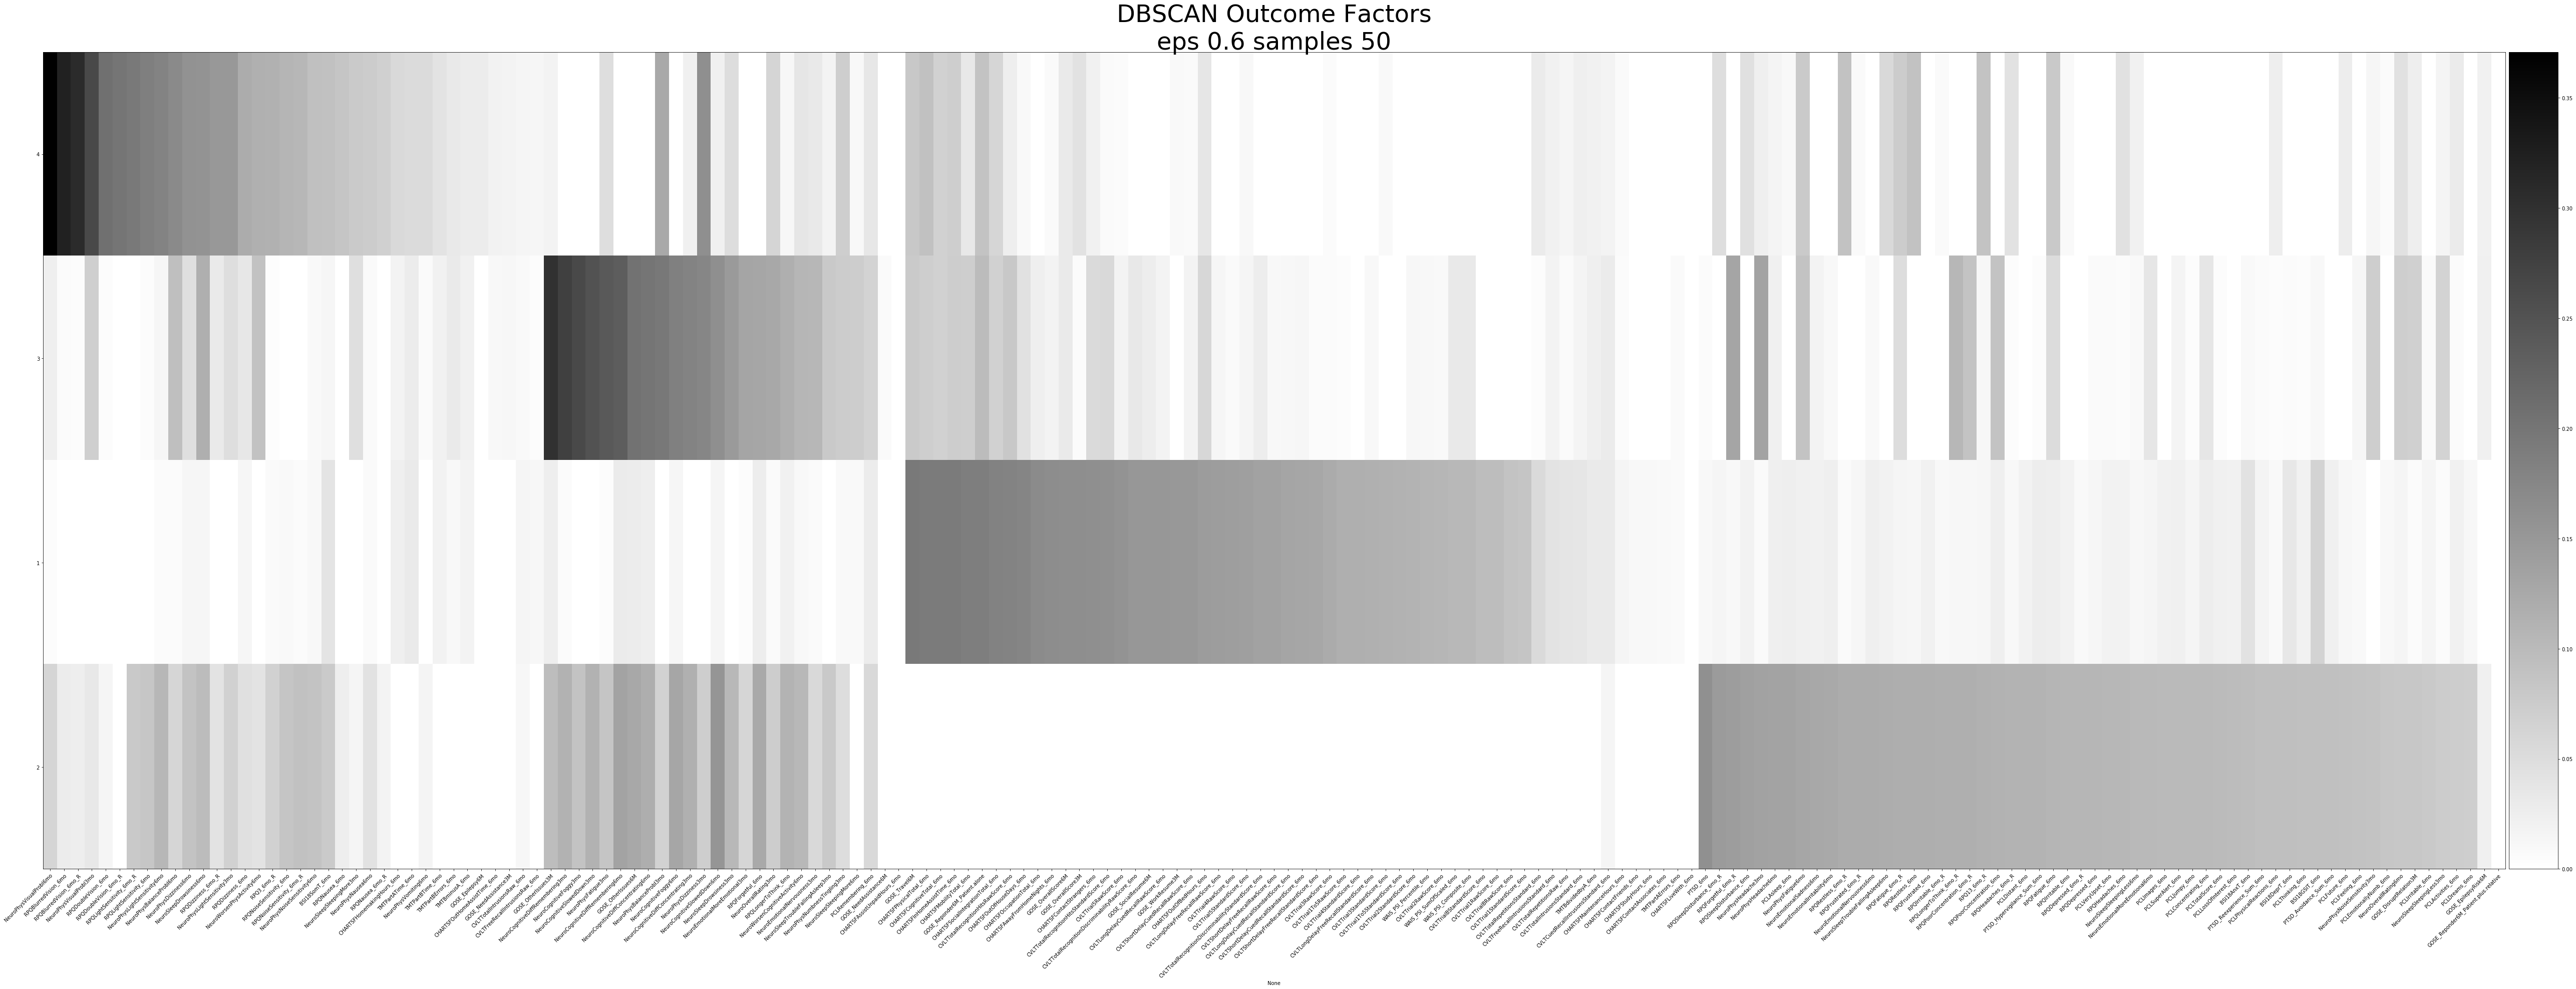

In [29]:
plt.figure(figsize=(90,30))
nmf_bases_heatmap(uoinmf.components_, data.outcome_features, sort=True, ax=None, aspect='auto',
                  title='DBSCAN Outcome Factors\neps 0.6 samples 50')
plt.savefig('/Users/ahyeon/Desktop/activ misc/dbscan_oc.pdf')

<Figure size 6480x2160 with 0 Axes>

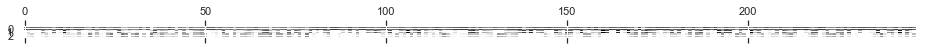

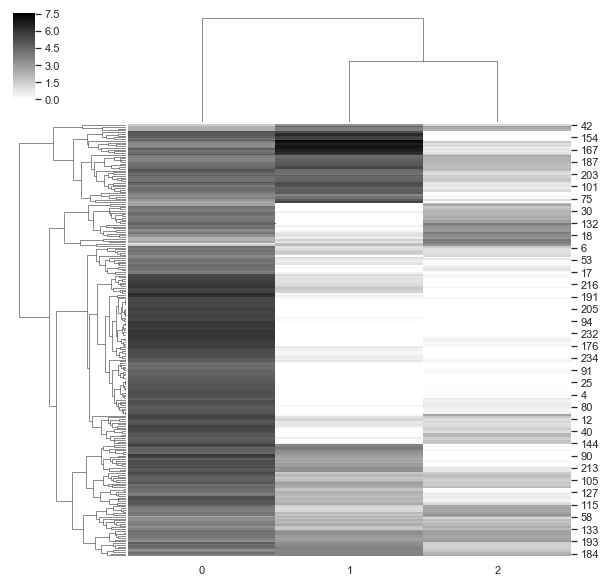

In [15]:
plt.figure(figsize=(90,30))
plt.matshow(oc_weight.T, cmap='gray_r')
g = sns.clustermap(oc_weight, cmap='gray_r')

In [7]:
# biomarkers
db_bm = DBSCAN(eps=.6, min_samples=55)
uoinmf_bm = UoINMF(ranks=list(range(2,20)),dbscan=db_bm)
uoinmf_bm.fit(data_bm)
bm_weight = uoinmf_bm.fit_transform(data_bm)
print(bm_weight.shape)

(247, 4)


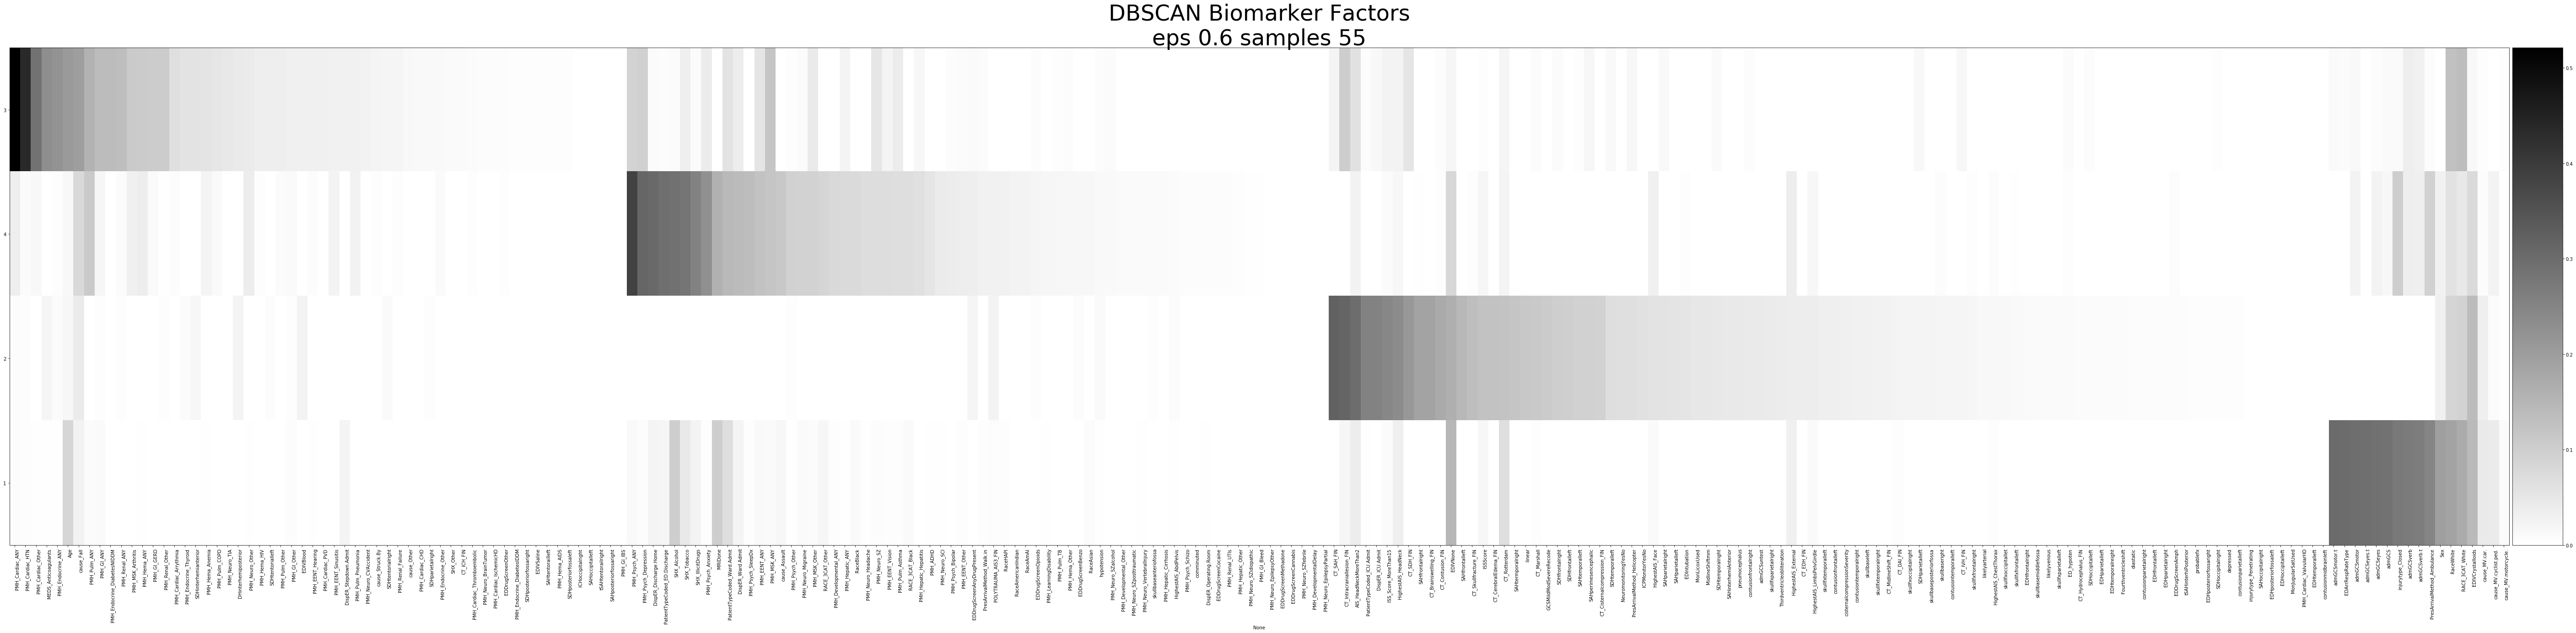

In [8]:
plt.figure(figsize=(100,20))
nmf_bases_heatmap(uoinmf_bm.components_, data.biomarker_features, sort=True, ax=None, aspect='auto',
                  title='DBSCAN Biomarker Factors\neps 0.6 samples 55')
plt.savefig('/Users/ahyeon/Desktop/activ misc/dbscan_bm.pdf')

<Figure size 6480x2160 with 0 Axes>

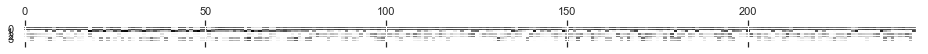

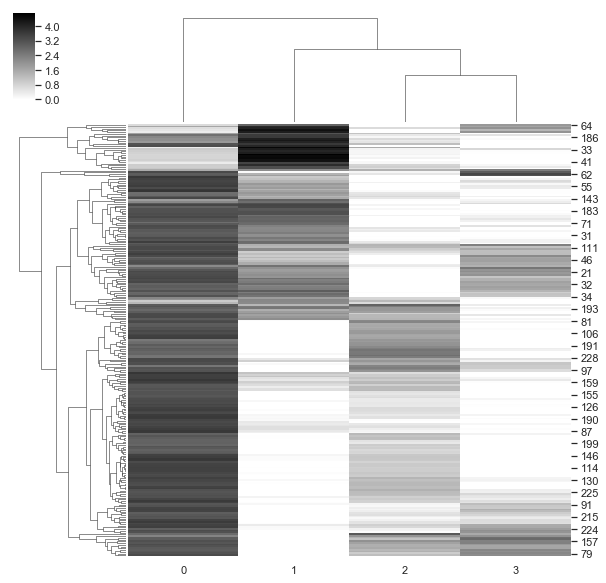

In [16]:
plt.figure(figsize=(90,30))
plt.matshow(bm_weight.T, cmap='gray_r')
sns.clustermap(bm_weight, cmap='gray_r')